In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1.DATA COLLECTION AND PREPARATION** :-

IMPORTING THE REQUIRED LIBRARIES :- 

In [2]:
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
import warnings 
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report,confusion_matrix,RocCurveDisplay
import pickle

READ THE DATASET :-

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/collegePlace.csv')

In [4]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


NUMERICAL ANALYSIS :-

In [5]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


No missing values ...

HANDLING CATEGORICAL VALUES :-

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [8]:
df.drop('Hostel',axis=1,inplace=True)

In [9]:
df.head()

,Age,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1
1,21,Female,Computer Science,0,7,1,1
2,22,Female,Information Technology,1,6,0,1
3,21,Male,Information Technology,0,8,1,1
4,22,Male,Mechanical,0,8,0,1


**EDA : Exploratory Data Analysis :-**

UNIVARIATE ANALYSIS :-

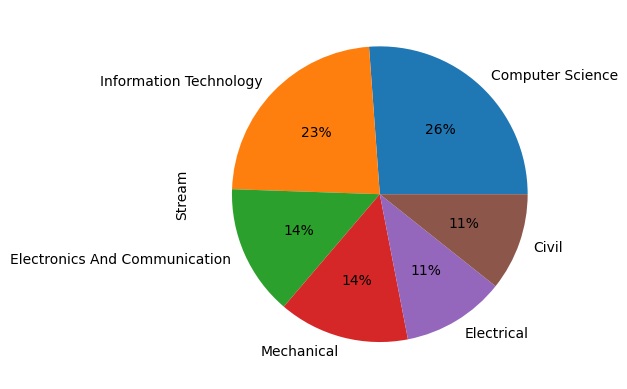

In [10]:
df['Stream'].value_counts().plot(kind='pie',autopct='%1.0f%%')
plt.show()

<Axes: xlabel='Age'>

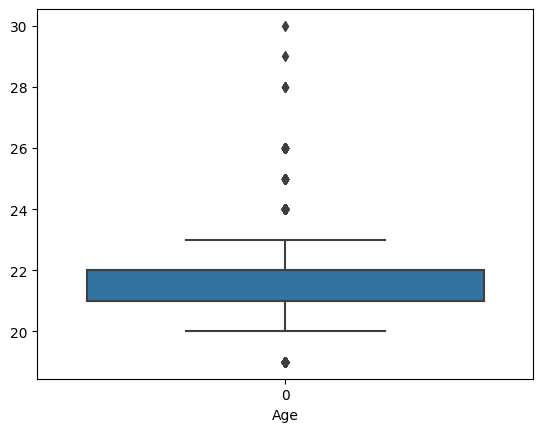

In [11]:
plt.xlabel('Age')
sns.boxplot(df['Age'])

<Axes: xlabel='CGPA', ylabel='Density'>

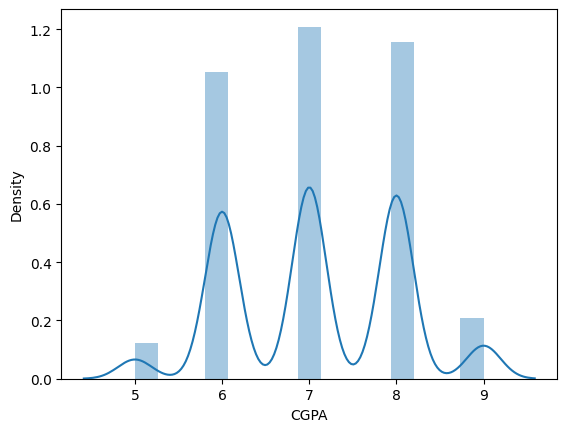

In [12]:
sns.distplot(df['CGPA'])

<Axes: xlabel='Internships', ylabel='Count'>

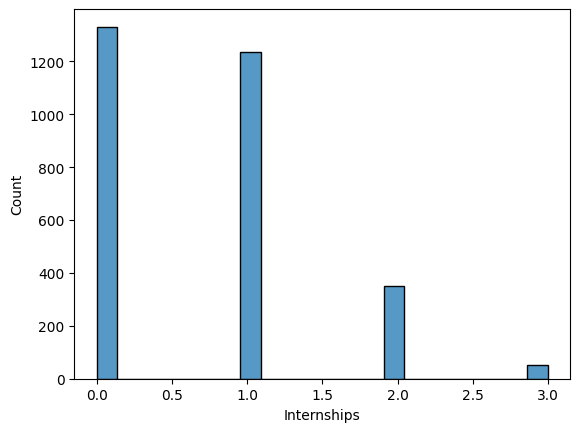

In [13]:
sns.histplot(df,x='Internships')

BIVARIATE ANALYSIS :-

<Axes: xlabel='Age', ylabel='count'>

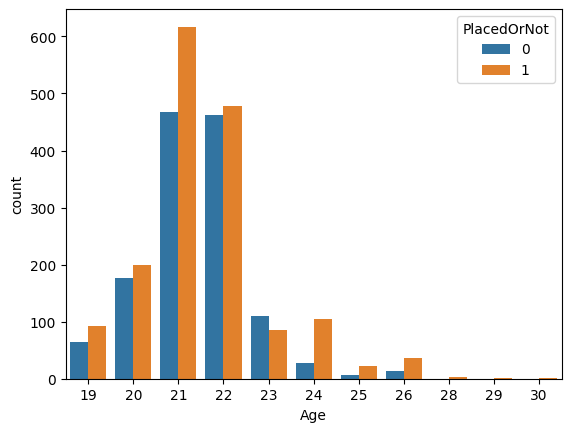

In [14]:
sns.countplot(df,x='Age',hue='PlacedOrNot')

<Axes: xlabel='HistoryOfBacklogs', ylabel='count'>

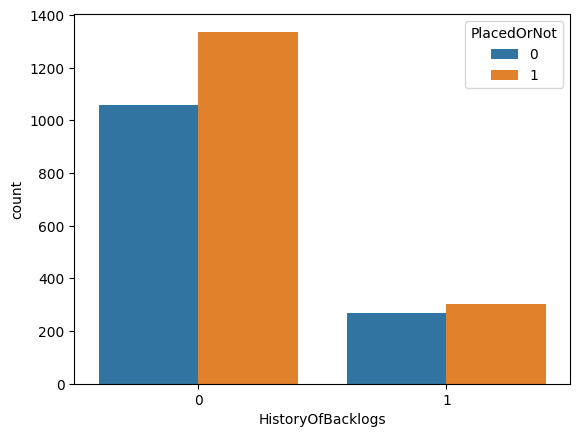

In [15]:
sns.countplot(df,x='HistoryOfBacklogs',hue='PlacedOrNot')

MULTIVARIATE ANALYSIS :-

<Axes: xlabel='HistoryOfBacklogs', ylabel='Age'>

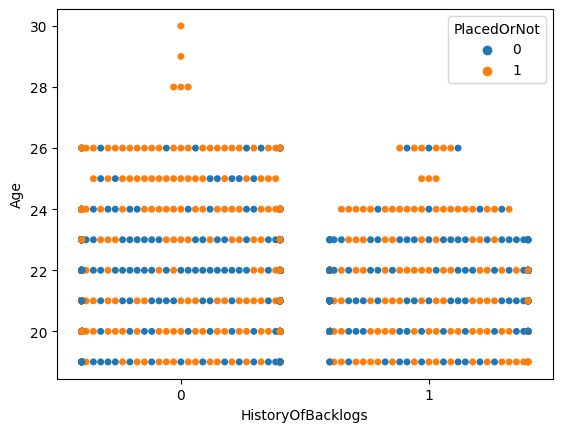

In [16]:
sns.swarmplot(df,x='HistoryOfBacklogs',y='Age',hue='PlacedOrNot')

In [17]:
df['Gender'].value_counts()

Male      2475
Female     491
Name: Gender, dtype: int64

In [18]:
df.Gender = df.Gender.replace({'Male':1,'Female':0})

In [19]:
df.Stream.value_counts()

Computer Science                 776
Information Technology           691
Electronics And Communication    424
Mechanical                       424
Electrical                       334
Civil                            317
Name: Stream, dtype: int64

In [20]:
df['Stream'].replace({'Computer Science':0,'Information Technology':1,'Electronics And Communication':2,'Mechanical':3,'Electrical':4,'Civil':5},inplace=True)

In [21]:
df['CGPA'].value_counts()

7    956
8    915
6    834
9    165
5     96
Name: CGPA, dtype: int64

<Axes: >

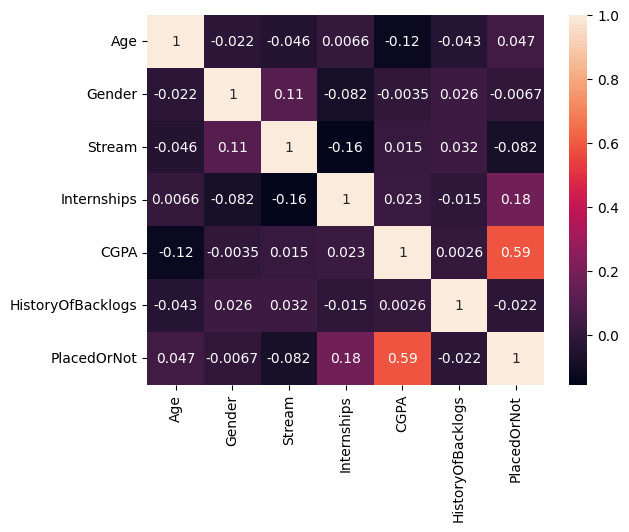

In [22]:
sns.heatmap(df.corr(),annot=True)

SEPARATING DEPENDENT AND INDEPENDENT VARIABLES :-

In [23]:
x = df.drop(columns ='PlacedOrNot', axis=1)
y = df['PlacedOrNot']

SCALING THE DATA:-

In [24]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=scaler.get_feature_names_out())
print(x)

           Age    Gender    Stream  Internships      CGPA  HistoryOfBacklogs
0     0.388131  0.445403  0.040082     0.400445  0.957191           2.050246
1    -0.366752 -2.245158 -1.148743    -0.950773 -0.076310           2.050246
2     0.388131 -2.245158 -0.554331     0.400445 -1.109812          -0.487746
3    -0.366752  0.445403 -0.554331    -0.950773  0.957191           2.050246
4     0.388131  0.445403  0.634494    -0.950773  0.957191          -0.487746
...        ...       ...       ...          ...       ...                ...
2961  1.143013  0.445403 -0.554331    -0.950773 -0.076310          -0.487746
2962  1.143013  0.445403  0.634494     0.400445 -0.076310          -0.487746
2963  0.388131  0.445403 -0.554331     0.400445 -0.076310          -0.487746
2964  0.388131  0.445403 -1.148743     0.400445 -0.076310          -0.487746
2965  1.143013  0.445403  1.823319    -0.950773  0.957191          -0.487746

[2966 rows x 6 columns]


In [25]:
pickle.dump(scaler,open('scaler.pkl','wb'))

SPLITTING THE DATA INTO TRAIN AND TEST

In [26]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size=0.2, stratify=y, random_state=2)
print(x.shape, x_train.shape, x_test.shape )

(2966, 6) (2372, 6) (594, 6)


**MODEL BUILDING :-**

SVM MODEL :-

In [27]:
svc = svm.SVC(kernel ='linear')
svc.fit(x_train,y_train)

y_pred = svc.predict(x_train)
train_acc = accuracy_score(y_pred,y_train)
y_pred = svc.predict(x_test)
test_acc = accuracy_score(y_pred,y_test)
print('training data accuracy : ',train_acc)
print('testing data accuracy : ',test_acc)

training data accuracy :  0.7685497470489039
testing data accuracy :  0.7794612794612794


KNN MODEL :-

In [28]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

y_pred = knn.predict(x_train)
train_acc = accuracy_score(y_pred,y_train)
y_pred = knn.predict(x_test)
test_acc = accuracy_score(y_pred,y_test)
print('training data accuracy : ',train_acc)
print('testing data accuracy : ',test_acc)

training data accuracy :  0.8929173693086003
testing data accuracy :  0.8619528619528619


ARTIFICIAL NEURAL NETWORK :-

In [29]:
ann = Sequential()
ann.add(keras.layers.Dense(6,activation = 'selu'))
ann.add(keras.layers.Dense(24,activation = 'selu'))
ann.add(keras.layers.Dense(12,activation = 'selu'))

ann.add(keras.layers.Dense(1,activation='sigmoid'))

In [30]:
# compiting the model
loss_1 = tf.keras.losses.BinaryCrossentropy()
ann.compile(optimizer='Adam',loss=loss_1,metrics=['accuracy'])

# fitting the model-
ann.fit(x_train,y_train,batch_size =20 ,epochs=100)

Epoch 1/100
119/119 [==============================] - 1s 2ms/step - loss: 0.5866 - accuracy: 0.6838
Epoch 2/100
119/119 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.7745
Epoch 3/100
119/119 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7774
Epoch 4/100
119/119 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.7846
Epoch 5/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3880 - accuracy: 0.8019
Epoch 6/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3680 - accuracy: 0.8280
Epoch 7/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8402
Epoch 8/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3453 - accuracy: 0.8364
Epoch 9/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3395 - accuracy: 0.8478
Epoch 10/100
119/119 [==============================] - 0s 2ms/step - loss: 0.3335 - accura

In [31]:
#with the model 

y_pred = ann.predict(x_train)
y_pred =(y_pred >0.5)
train_acc = accuracy_score(y_pred,y_train)

y_pred = ann.predict(x_test)
y_pred =(y_pred >0.5)
test_acc = accuracy_score(y_pred,y_test)

print('training data accuracy : ',train_acc)
print('testing data accuracy : ',test_acc)

19/19 [==============================] - 0s 2ms/step
training data accuracy :  0.8823777403035413
testing data accuracy :  0.8569023569023569


HYPER-PARAMETER TUNING :-

In [32]:
from sklearn.model_selection import RandomizedSearchCV
params = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma': [1, 0.1, 0.001],
              }

rscv = RandomizedSearchCV(svm.SVC(), params)
rscv.fit(x_train, y_train)

print("Best hyperparameters: ", rscv.best_params_)

Best hyperparameters:  {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}


In [33]:
svc2 = svm.SVC(kernel ='rbf',gamma=0.1,C=100)
svc2.fit(x_train,y_train)

y_pred = svc2.predict(x_train)
train_acc = accuracy_score(y_pred,y_train)
y_pred = svc2.predict(x_test)
test_acc = accuracy_score(y_pred,y_test)
print('training data accuracy : ',train_acc)
print('testing data accuracy : ',test_acc)

training data accuracy :  0.8920741989881956
testing data accuracy :  0.8686868686868687


In [34]:
best_k = {'Regular':0}
best_score ={'Regular': 0}
for k in range(3,50,2):
  ##using Regular trainning set
  knn_temp =KNeighborsClassifier(n_neighbors=k)
  knn_temp.fit(x_train,y_train)
  knn_temp_pred=knn_temp.predict(x_test)
  score=metrics.accuracy_score(y_test, knn_temp_pred)*100
  if(score >= best_score['Regular'] and score<100):
    best_score['Regular'] = score
    best_k['Regular']=k
best_k['Regular']  

7

In [35]:
knn2 = KNeighborsClassifier(n_neighbors=best_k['Regular'])
knn2.fit(x_train,y_train)

y_pred = knn2.predict(x_train)
train_acc = accuracy_score(y_pred,y_train)
y_pred = knn2.predict(x_test)
test_acc = accuracy_score(y_pred,y_test)
print('training data accuracy : ',train_acc)
print('testing data accuracy : ',test_acc)

training data accuracy :  0.887858347386172
testing data accuracy :  0.8636363636363636


EVALUATING THE MODEL :-

In [36]:
def cl_res(name,model):
    y_pred = model.predict(x_test)
    if(name=='ANN'):
        y_pred = [0 if x<0.5 else 1 for x in y_pred]
    print(name,' :-\n-------------------------')
    print('accuracy score of ',name,' : ',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred,target_names=['no delay','delay']))
    print('confusion matrix : \n',confusion_matrix(y_test,y_pred))
    print('\n')
    # plt.subplot(121)
    plt.figure(figsize=(3,2))
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
    # plt.subplot(122)
    plt.figure(figsize=(1,1))
    RocCurveDisplay.from_predictions(y_test,y_pred)
    plt.show()
    print('\n\n')

In [37]:
models = {'SVM':svc,'SVM2':svc2,'KNN':knn,'knn2':knn2,'ANN':ann}

In [38]:
def prediction(model,input):
  output = model.predict(input)
  if isinstance(model,Sequential):
    output = output > 0.5
  return output

In [39]:
for name , model in models.items():
  y_pred = prediction(model,x_test)
  print('accuracy score of ',name,' : ',accuracy_score(y_test,y_pred))

accuracy score of  SVM  :  0.7794612794612794
accuracy score of  SVM2  :  0.8686868686868687
accuracy score of  KNN  :  0.8619528619528619
accuracy score of  knn2  :  0.8636363636363636
19/19 [==============================] - 0s 1ms/step
accuracy score of  ANN  :  0.8569023569023569


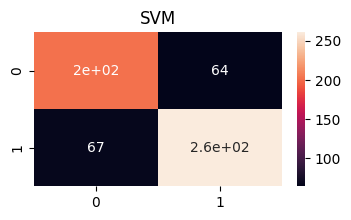

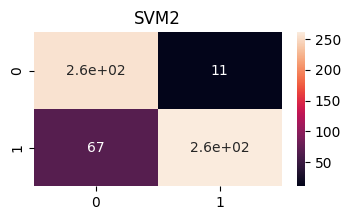

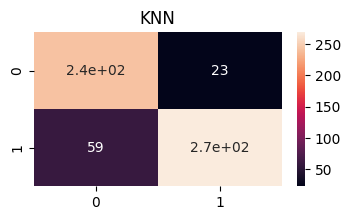

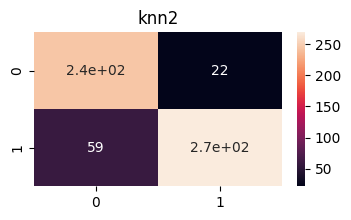

19/19 [==============================] - 0s 1ms/step


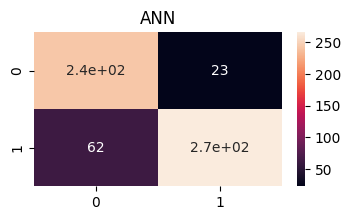

In [40]:
count = 1
for name , model in models.items():
  y_pred = prediction(model,x_test)
  plt.figure(figsize=(4,2))
  plt.title(name)
  count+=1
  sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
  plt.show()

SVM
SVM2
KNN
knn2
19/19 [==============================] - 0s 1ms/step
ANN


<Figure size 200x100 with 0 Axes>

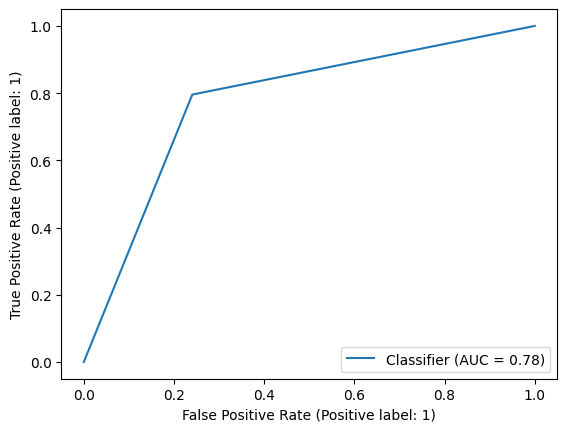

<Figure size 200x100 with 0 Axes>

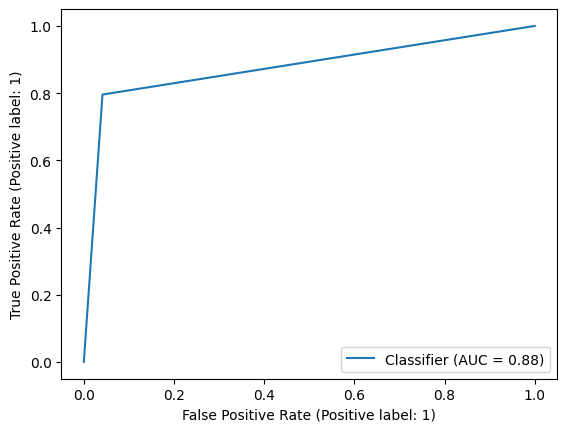

<Figure size 200x100 with 0 Axes>

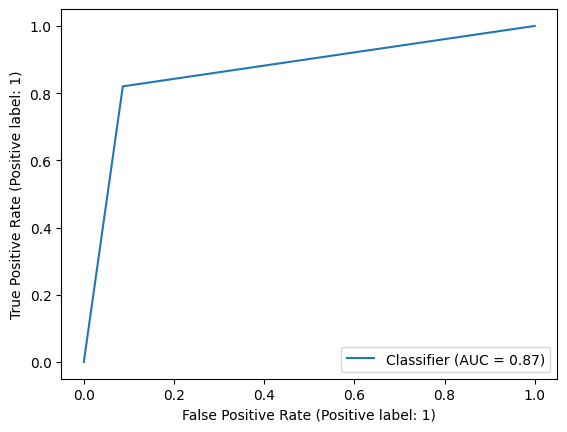

<Figure size 200x100 with 0 Axes>

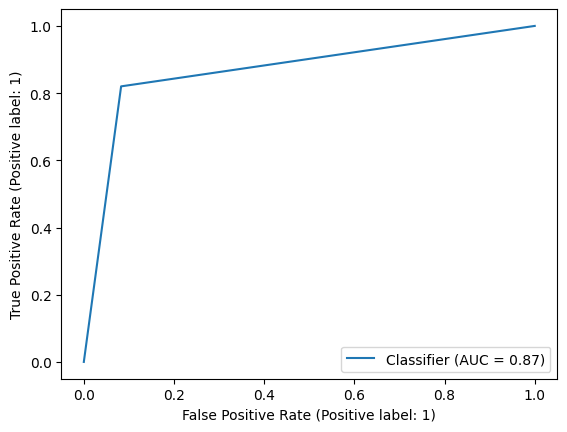

<Figure size 200x100 with 0 Axes>

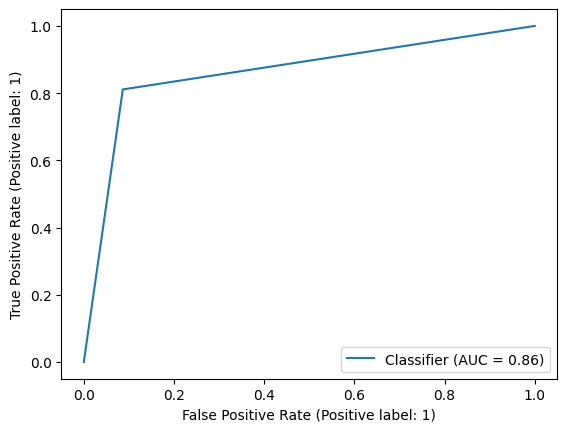

In [41]:
for name,model in models.items():
    y_pred = prediction(model,x_test)
    plt.figure(figsize=(2,1))
    print(name)
    RocCurveDisplay.from_predictions(y_test,y_pred)

SAVING THE MODEL :-

In [ ]:
pickle.dump(svc2,open('svc.pkl','wb'))